In [1]:
# 載入模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
np.random.seed(10)

Using TensorFlow backend.


In [2]:
# 載入資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 看資料大小
# your ans

train data = 60000
test data = 10000
x_train data = (60000, 28, 28)
y_train data = (60000,)
x_test data = (10000, 28, 28)
y_test data = (10000,)


In [4]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap="binary")
    plt.show()

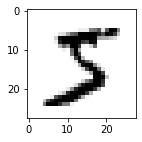

5


In [5]:
# 查看照片
# your ans

In [6]:
# 查看多筆資料
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num > 25: num:25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[idx], cmap="binary")
    title = "label =" + str(labels[idx])
    if len(prediction) > 0:
      title += ",predict" + str(prediction[idx])
    ax.set_title(title, fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx += 1
  plt.show()

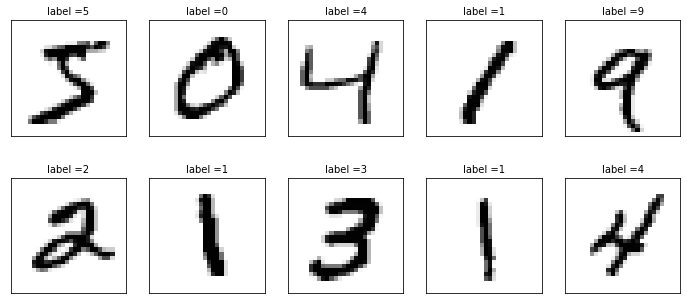

In [7]:
# 查看多筆train資料
plot_images_labels_prediction(x_train, y_train, [], 0, 10)

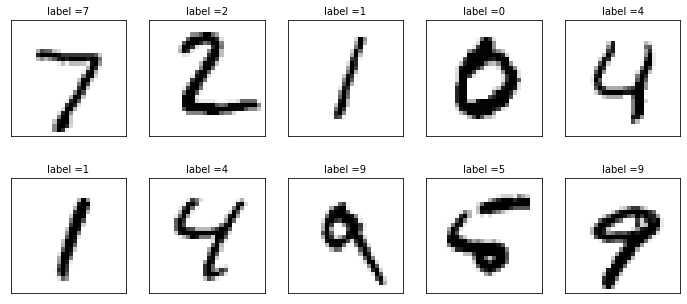

In [8]:
# 查看多筆test資料
# your ans

In [9]:
# 將 train features 數字影像特徵值轉為 4 維矩陣
x_train4d = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
# 將 test features 數字影像特徵值轉為 4 維矩陣
# your ans

In [10]:
# 將 train features 標準化
x_train4d_normalize = x_train4d / 255
# 將 test features 標準化
# your ans

In [11]:
# 將 train label 以 onehot encoding 轉換
y_trainonehot = np_utils.to_categorical(y_train)
# 將 test label 以 onehot encoding 轉換
# your ans

In [12]:
model = Sequential()
# 建立卷積層 1
model.add(Conv2D(filters = 16, 
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu'))

In [13]:
# 建立池化層
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
# 建立卷積層 2
model.add(Conv2D(filters = 36, 
                 kernel_size = (5, 5),
                 padding = 'same',
                 activation = 'relu'))

In [15]:
# 建立池化層，並加入d ropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [16]:
# 建立神經網路(平坦層＋隱藏層＋輸出層)
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))

In [17]:
# 查看模型
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [18]:
# 定義訓練方式
model.compile(loss = 'categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

In [19]:
# 開始訓練
train_history = model.fit(x = x_train4d_normalize,
                          y = y_trainonehot,
                          validation_split = 0.2,
                          epochs = 5,
                          batch_size = 300,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 57s - loss: 0.3991 - accuracy: 0.8776 - val_loss: 0.0910 - val_accuracy: 0.9731
Epoch 2/5
 - 69s - loss: 0.1023 - accuracy: 0.9686 - val_loss: 0.0607 - val_accuracy: 0.9820
Epoch 3/5
 - 69s - loss: 0.0735 - accuracy: 0.9768 - val_loss: 0.0485 - val_accuracy: 0.9851
Epoch 4/5
 - 67s - loss: 0.0588 - accuracy: 0.9814 - val_loss: 0.0467 - val_accuracy: 0.9870
Epoch 5/5
 - 64s - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0404 - val_accuracy: 0.9883


In [21]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

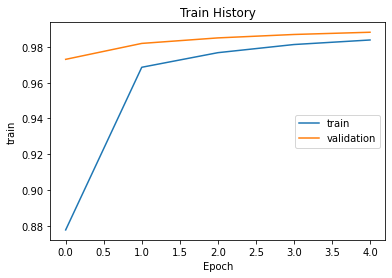

In [22]:
# 畫出 acc 執行結果
show_train_history(train_history, 'accuracy', 'val_accuracy')

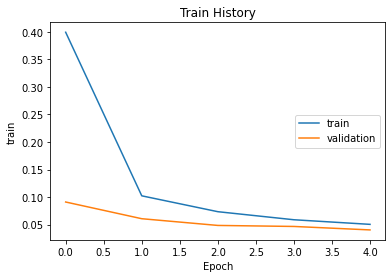

In [23]:
# 畫出 loss 執行結果
# your ans

In [24]:
# 評估模型準確度
scores = model.evaluate(x_test4d_normalize, y_testonehot)
scores[1]

10000/10000 [==============================] - 4s 417us/step


0.9914000034332275

In [25]:
# 執行預測
prediction = model.predict_classes(x_test4d_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

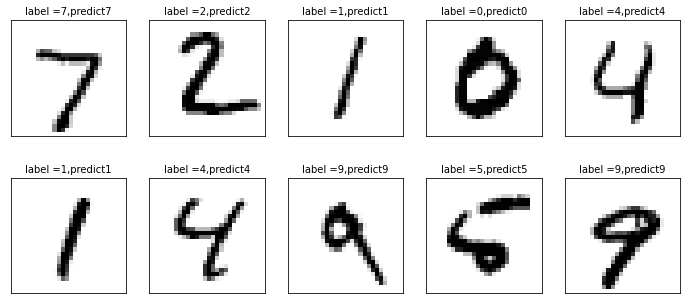

In [26]:
# 顯示預測結果
# your ans

In [27]:
# 混淆矩陣
pd.crosstab(y_test, prediction,
            rownames = ['label'],
            colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,0,0,0,0,2,1,3,0
1,0,1130,1,0,0,0,2,1,1,0
2,1,0,1028,0,0,0,0,1,2,0
3,0,0,1,1003,0,2,0,1,2,1
4,0,0,0,0,979,0,1,0,0,2
5,2,0,0,4,0,883,2,0,0,1
6,3,2,0,0,1,2,949,0,1,0
7,0,2,9,1,0,0,0,1012,2,2
8,1,0,0,2,0,1,0,2,967,1
